# Dynamic Programming and Structural Econometrics #13

### Time iterations and the Endogenous gridpoint method (EGM)

**Readings:** 
📖 Carroll (2006) Original article on EGM
  [link](http://pages.stern.nyu.edu/~dbackus/Computation/Carroll%20endog%20grid%20EL%2006.pdf)
  
by Bertel Schjerning

University of Copenhagen



### This Lecture
1. The Euler Equation 
1. Time Iterations
1. Endogenous Gridpoint Method (EGM)


# The Euler Equation 


### **First-order conditions in dynamic models with continuous choice**
The Bellman equation for the **infinite horizon**, $T = \infty$:

$$
V(s) = \max_{d \in D(s)} \big[u(s, d) + \beta \int V(s')p(ds'|s, d)  \big]
$$ 

- We can derive first-order conditions (FOCs) for the maximization problem in the Bellman equation.  
- **FOCs must be satisfied for the optimal policy** - *unless constraints are binding*

### **Why do we care about FOCs?**  
FOC play key role in solving and validating dynamic models:
- **Using FOCs to solve the model**  
  - Backwards induction using equation solving instead of optimization  
  - Time iterations in infinite horizon problems  

- **Using FOCs to check accuracy of numerical solutions**  
  - Euler residuals accuracy check  
  - Flat consumption path must be simulated under specific parameter restrictions (Keane test)  
  - Other known theoretical properties of the solution must hold  


### **Example: Consumption-Savings Problem (Deaton’s Model)**  

The agent maximizes expected lifetime utility:

$$
V(M) = \max_{0 \le c \le M} \big\{ u(c) + \beta \mathbb{E}_{y} V\big( \underset{=M'}{\underbrace{R(M - c) + \tilde{y}}} \big) \big\}
$$

where:  

- **Discrete time**
- **Infinite horizon**  
- **Choice variable**: consumption $ 0 \leq c \leq M $  
- **State variable**: cash-on-hand $ M $, discretized  
- **Stochastic income**: $ \tilde{y} $ follows a log-normal distribution with $ \mu = 0 $ and $ \sigma $

### **First-Order Conditions for Deaton’s Model**  

The agent's optimization problem:

$$
V(M) = \max_{0 \le c \le M} \big\{ u(c) + \beta \mathbb{E}_{y} V\big( \underset{=M'}{\underbrace{R(M - c) + \tilde{y}}} \big) \big\}
$$

#### **First-Order Condition (FOC)**  

$$
u'(c^\star) = \beta R \mathbb{E}_{y} V'\big(R(M - c^\star) + \tilde{y} \big)
$$

- Defines the implicit function $ c^\star(M) $ — *policy function*  
- Requires handling of $ V'(\cdot) $ in numerical implementation   

### **Envelope Theorem**  

Define the choice specific value function:

$$
G(M, c) = u(c) + \beta \mathbb{E}_{y} V\big(\underset{=M'}{\underbrace{R(M - c) + \tilde{y}}}\big)
$$

Since the optimal policy function satisfies $ V(M) = G(M, c^\star(M)) $, differentiation yields:

$$
V'(M) = \tfrac{\partial G(M, c^\star)}{\partial M} + 
\underset{ =0 \text{ by FOC}}{\underbrace{\tfrac{\partial G(M, c^\star)}{\partial c^\star}} \tfrac{\partial c^\star(M)}{\partial M}}
= \tfrac{\partial G(M, c^\star)}{\partial M} = \beta R \mathbb{E}_{y} V'\big(R(M - c^\star) + \tilde{y}\big)
$$

- The derivative w.r.t. $ c^\star $ vanishes due to the first-order condition.  
- Establishes the recursive structure of $ V'(M) $.  

### **Euler Equation for Deaton's Model**  

**First-order condition (FOC)**:

$$
u'(c^\star) = \beta R \mathbb{E}_{y} V'\big(R(M - c^\star) + \tilde{y}\big)
$$

**Envelope Theorem**:

$$
V'(M) = \beta R \mathbb{E}_{y} V'\big(R(M - c^\star) + \tilde{y}\big)
$$

Since both expressions share the right-hand side, we obtain:

$$
u'(c^\star) = V'(M)
$$

Substituting into the FOC gives the **Euler Equation**:

$$
u'\big(c^\star(M)\big) = \beta R \mathbb{E}_{y} u'\big(c^\star\big(\underset{=M'}{\underbrace{R[M - c^\star(M)] + \tilde{y}}}\big)\big)
$$

- **Intertemporal optimality**: marginal utility today equals discounted expected marginal utility tomorrow.  
- *Euler Equation forms basis for numerical solution methods*.

### **Perfect Consumption Smoothing (The Keane Test)**  

In a **deterministic model** with fixed income $ \tilde{y} $ and **$\beta R = 1$**, the Euler equation simplifies to:

$$
u'\big(c^\star(M)\big) = u'\big(c^\star(M')\big) \Rightarrow c^\star(M) = c^\star(M')
$$

This implies **constant consumption** over time — **perfect consumption smoothing**.  

**The Keane Test**  
A robust **accuracy check** for numerical methods: if the solution is correct, simulated consumption paths must be **exactly flat**.  

The test originates from **Michael Keane**, who, when shown an "almost flat" path by Fedor Iskhakov, famously demanded:  

> **"MAKE IT FLAT!!!"**  

Any deviation signals numerical error.

### **Accuracy Measure Using Euler Equation**  

A common accuracy check for numerical solutions is the **average squared Euler residuals** over a dense grid of $ K $ points:

$$
ER\big( c(M) \big) = u'\big(c(M)\big) - \beta R \mathbb{E}_{y} u'\big(c\big(R[M-c(M)]+\tilde{y}\big)\big)
$$

$$
Q \big( c(M) \big) = \frac{1}{K} \sum_{k=1}^{K} {ER}^2\big( c(M_k) \big)
$$

A **good solution** satisfies $ Q\big( c(M) \big) \approx 0 $, indicating small numerical errors.

⚠ **Note:** Euler residuals will **only be zero** when constraints are **not binding**—otherwise, the shadow price of the constraint must be incorporated.

# Time Iterations


### **Time Iterations**

This method **solves the Euler equation** in the space of policy functions $ c(M) \in \mathcal{P} $ as a *functional equation*:

$$
u'\big(c(M)\big) = \beta R \mathbb{E}_{y} u'\big(c[R(M-c(M))+\tilde{y}]\big)
$$

The solution is the **fixed point** of the *Coleman-Reffett operator* $ K(c)(M) $, which:

- Takes as input a policy function $ c(M) \in \mathcal{P} $  
- Returns an updated policy function $ c'(M) \in \mathcal{P} $ satisfying:

$$
u'\big(c'(M)\big) = \beta R \mathbb{E}_{y} u'\big(c[R(M-c'(M))+\tilde{y}]\big) \quad \text{if} \quad 0 < c'(M) < M
$$

### **Is the Coleman-Reffett Operator a Contraction Mapping?**  

Yes, in an appropriate metric space with a specially defined norm.  

📖 *Huiyu Li & John Stachurski (2014, JEDC)*:  
*"Solving the income fluctuation problem with unbounded rewards"*

Key implications:  
- **Existence and uniqueness** of the solution  
- **Successive approximations** lead to convergence  
- **Globally convergent** method  

### Time iteration algorithm

1. Discretize the state space  
1. Set the initial policy $ c_0(M) $ at state grid  
1. Increment iteration counter $ i $ (initialize to 0)  
1. Solve Euler equation in every point of the the grid, i.e. plug $ c_{i-1}(M) $ to the
  RHS of the Euler equation, and solve for the $ c $ in the LHS, it becomes new $ c_i(M) $. 
constrained is imposed so that c=M
1. Check for convergence in policy function space:  
  - If converged, output $ c_i(M) $  
  - Otherwise, return to step 3.  
  
Note that in step 4 we need to check if FOC is sufficient. If Euler residual is positive for c=M (i.e. consumer would like consume more today that available), we are in a corner solution and impose the constraint. 

### **Time Iteration Algorithm**

1. **Discretize** the state space.  
2. **Initialize policy function** $ c_0(M) $ on the state grid.  
3. **Iterate**: Increment counter $ i $ (starting from 0).  
4. **Solve Euler equation** at each grid point:  
   - Use previous policy $ c_{i-1}(M) $ in the RHS of the Euler equation.  
   - Solve for $ c $ on the LHS to obtain the updated policy $ c_i(M) $.  
   - Impose constraint $ c = M $ if necessary.  
5. **Check for convergence** in policy function space:  
   - If converged, return $ c_i(M) $.  
   - Otherwise, repeat from step 3.  

**Check for corner solutions:** 
- Verify that FOC is sufficient (in step 4)  
- **If Euler residuals are positive for $ c = M $** 
<br>$\Rightarrow$  consumer wants to consume more today than available 
<br> $\Rightarrow$ impose the constraint.

### **Accuracy and Speed: Time Iteration vs. VFI**

How does **time iteration** compare to **Value Function Iteration (VFI)** with explicit maximization?

- **Same theoretical complexity** and convergence rates.  
- **Policy functions have less curvature** → easier interpolation → smaller interpolation errors  → less fine interpolation needed.  
- **Faster convergence** due to reduced numerical optimization at each step.  
- **Higher accuracy** (less points needed for same interpolation accurcy)

**Next:** Empirical experiments to compare performance.

### Need some libraries

In [1]:
%clear
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy import interpolate  # Interpolation routines
from scipy.optimize import minimize_scalar, brentq  # Root-finding methods

### Initialize Deaton class (will add bellman operator and Coleman-Reffett operator later)

In [2]:
class deaton():
    '''Class to implement Deaton's model with log-normally distributed income shocks'''
    
    def __init__(self,
                 β=0.9,         # Discount factor
                 R=1,           # Returns on savings
                 μ=0,           # Mean of log-normal income shock, ln(y) ~ N(μ, σ^2)  
                 σ=1,           # Standard deviation of log-normal income shock
                 η=1,           # CRRA utility parameter (η=0: linear, η=1: log, η>1: more risk averse)
                 xbar=[0, 10],  # Bounds on cash-on-hand
                 n_x=100,        # Number of state space grid points
                 n_y=10,        # Number of quadrature points for income shock
                 maxiter_c=100, tol_c=1e-4  # Numerical solver parameters
                 ):
        '''Initialize model parameters, state space, and quadrature integration'''

        # Store model parameters
        for arg in ('β', 'R', 'μ', 'σ', 'η', 'xbar', 'n_x', 'n_y', 'maxiter_c', 'tol_c'):
            setattr(self, arg, eval(arg))

        # Discretize state space (truncating lower bound to avoid numerical issues)
        self.xbar[0] = np.maximum(1e-10, self.xbar[0])  
        self.x = np.linspace(self.xbar[0], self.xbar[1], n_x).reshape((n_x, 1))

        # Generate quadrature nodes and weights for income shock
        q, w = np.polynomial.legendre.leggauss(n_y)  # Gauss-Legendre quadrature
        Ginv = lambda z: np.exp(scipy.stats.norm.ppf(z, loc=self.μ, scale=self.σ))  # Inverse CDF of log-normal
        self.weights = w / 2  # Adjust weights to [0,1] interval
        self.y = Ginv((q + 1) / 2)  # Transform nodes to income shock values
        
    def next_period_x(self, x, c, y):
        '''Compute next-period wealth given current cash-on-hand x, consumption c, and income y'''
        return self.R * (x - c) + y
        
    def utility(self, c):
        '''CRRA utility function'''
        if self.η == 1:
            return np.log(c)
        elif self.η >= 0:
            return (c**(1 - self.η) - 1) / (1 - self.η)
    
    def marginal_utility(self, c):
        '''Marginal utility function (CRRA)'''
        return c**(-self.η)

    def inv_marginal_utility(self, mu):
        '''Inverse marginal utility function (CRRA)'''
        return mu**(-1 / self.η)

### The Bellman equation
$$
V(M)=\max_{0 \le c \le M}\big\{u(c)+\beta \mathbb{E}_{y} V\big(\underset{=M'}{\underbrace{R(M-c)+\tilde{y}}}\big)\big\}
$$


In [3]:
class deaton(deaton):
    def bellman_V(self, V0):
        '''Bellman operator: computes value function and policy function (consumption).
        
        Args:
            V0 (numpy array): Initial value function defined on state grid.
            
        Returns:
            V (numpy array): Updated value function.
            c (numpy array): Optimal consumption policy.
        '''
        # Interpolation function for value function
        interp_V = interpolate.interp1d(self.x[:, 0], V0, bounds_error=False, fill_value='extrapolate')
        
        def neg_vc(c, x):
            '''Negative choice-specific value function for minimization'''
            x1 = self.next_period_x(x, c, self.y)  # Compute next period state
            vc = self.utility(c) + self.β * np.sum(self.weights * interp_V(x1))
            return -vc  # Negate for minimization
        
        # Allocate space for value and policy functions
        V = np.empty(self.n_x, dtype='float')
        c = np.empty(self.n_x, dtype='float')    
        
        # Optimizer settings
        opt = {'maxiter': self.maxiter_c, 'xatol': self.tol_c} 
        
        # Loop over state space to find optimal policy
        for i, x_i in enumerate(self.x[:, 0]):
            res = minimize_scalar(neg_vc, args=x_i, method='Bounded', bounds=[self.x[0, 0], x_i], options=opt)
            c[i] = res.x  # Store optimal consumption
            V[i] = -neg_vc(c[i], x_i)  # Compute value function, correcting for negation
        
        return V, c

### VFI

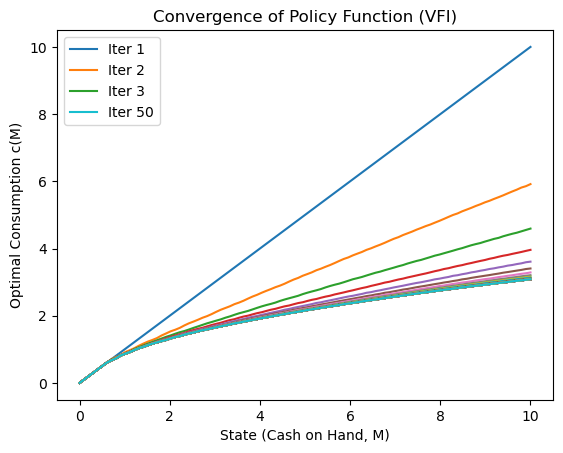

In [4]:
# Initialize model instance
m1 = deaton(n_x=100) 

# Initialize value function (zero everywhere)
V0 = np.zeros_like(m1.x[:, 0])

# Iterate value function iteration (VFI)
for i in range(50):
    V0, c = m1.bellman_V(V0)  # Solve Bellman equation
    plt.plot(m1.x, c, label=f"Iter {i+1}" if i in [0, 1, 2, 49] else "")  # Label key iterations

plt.xlabel("State (Cash on Hand, M)")
plt.ylabel("Optimal Consumption c(M)")
plt.title("Convergence of Policy Function (VFI)")
plt.legend()
plt.show()

### The Euler Residual
$$
ER\big( c(M) \big) = u'\big(c(M)\big) - \beta R \mathbb{E}_{y} u'\big(c\big(R[M-c(M)]+\tilde{y}\big)\big)
$$


In [5]:
class deaton(deaton):    
    def euler_residual(self, c, x, interp_c):
        '''Computes the Euler residuals for given points (x, c).
        
        Uses the interpolated consumption policy function, interp_c, 
        to compute the right-hand side of the Euler equation.
        '''
    
        # Compute RHS: Expected discounted marginal utility of future consumption
        x1 = self.next_period_x(x, c, self.y)       
        c1 = np.maximum(1e-1, interp_c(x1))  # Ensure positive consumption
        RHS = self.β * self.R * np.sum(self.weights * self.marginal_utility(c1))

        # Compute LHS: Marginal utility of current consumption
        LHS = self.marginal_utility(c)

        return LHS - RHS  # Euler residual

### Plot Euler residuals

In [6]:
def plot_euler_residuals(m1, c): 
    # Interpolate updated policy function
    interp_c0 = interpolate.interp1d(m1.x[:, 0], c, bounds_error=False, fill_value='extrapolate')

    # Compute Euler residuals 
    err = np.empty(m1.n_x, dtype='float')  
    for i, x_i in enumerate(m1.x):
        if c[i] < x_i - 0.0001:  # Interior solution where FOC applies
            err[i] = m1.euler_residual(c[i], x_i, interp_c0)
        else:
            err[i] = 0  # Boundary case where constraints bind

    # Plot Euler residuals
    plt.plot(m1.x[:, 0], err[:])
    plt.xlabel("State (Cash on Hand, M)")
    plt.ylabel("Euler Residuals")
    plt.title("Euler Residuals for VFI Solution (Refined Grid)")
    plt.show()

### The Euler residual for VFI solution
***TRY:*** *Change Grid Size, Run VFI Again, and Inspect Residuals*

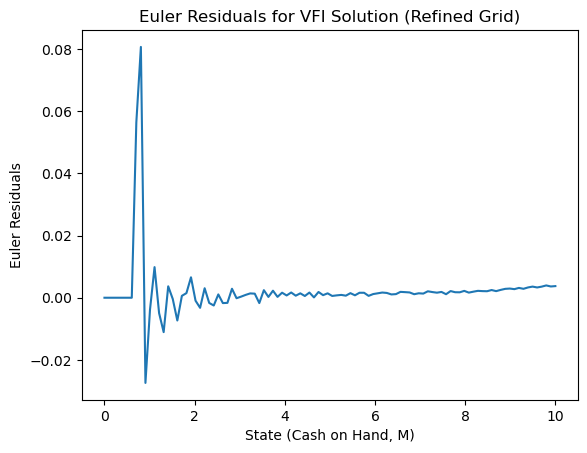

In [7]:
# Adjust grid size and reinitialize model and re-run Value Function Iteration (VFI)
m1 = deaton(n_x=100)  # TRY: Increase grid size for finer resolution
V0 = np.zeros_like(m1.x[:, 0])
for _ in range(100):  # TRY: Change number of iterations.
    V0, c = m1.bellman_V(V0)  # Solve Bellman equation    
plot_euler_residuals(m1, c)

### The Coleman-Reffet operator, $K(c)(M)$

In [8]:
class deaton(deaton):    
    def euler_iter(self, c0):
        '''Coleman-Reffett operator'''
        c = np.empty(self.n_x, dtype=float)  # Allocate space for policy function
        
        # Interpolation function for policy c0
        interp_c0 = interpolate.interp1d(self.x[:, 0], c0, bounds_error=False, fill_value='extrapolate') 

        for i, x_i in enumerate(self.x):    
            x_scalar = x_i.item()  # Extract scalar value safely (THIS IS WHY I SOMETIMES STILL HATE PYTHON)
            
            if x_scalar <= self.x[0] or self.euler_residual(c=x_scalar, x=x_scalar, interp_c=interp_c0) > 0:
                c[i] = x_scalar  # Corner solution (consume all available cash)
            else:  # First-order condition holds -> solve for c using root finding routibe
                c[i] = brentq(self.euler_residual, args=(x_scalar, interp_c0),
                              a=self.x[0], b=x_scalar, xtol=self.tol_c, 
                              maxiter=self.maxiter_c, full_output=False, disp=True) 
        return c

### Time iterations

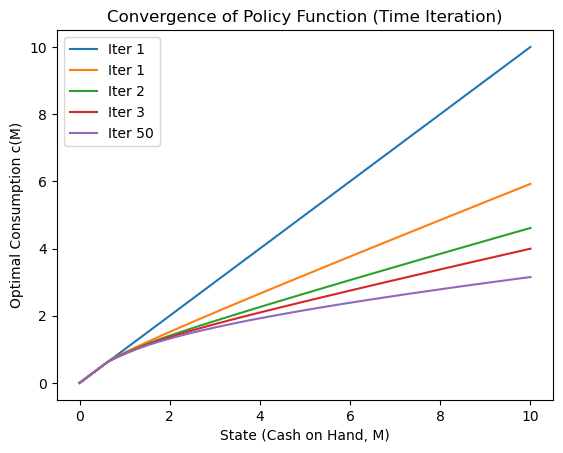

In [9]:
m1 = deaton()  # Create model instance

# **Initialize policy function**: Assume consuming everything in the first iteration
c = m1.x[:, 0]  
plt.plot(m1.x, c, label="Iter 1")

# **Iterate policy function using the Coleman-Reffett operator**
for i in range(50):
    c = m1.euler_iter(c)
    if i in [0, 1, 2, 49]:  # Plot key iterations
        plt.plot(m1.x, c, label=f"Iter {i+1}")

# **Plot results**
plt.xlabel("State (Cash on Hand, M)")
plt.ylabel("Optimal Consumption c(M)")
plt.title("Convergence of Policy Function (Time Iteration)")
plt.legend()
plt.show()

### The Euler residual for solution obtained by time iterations

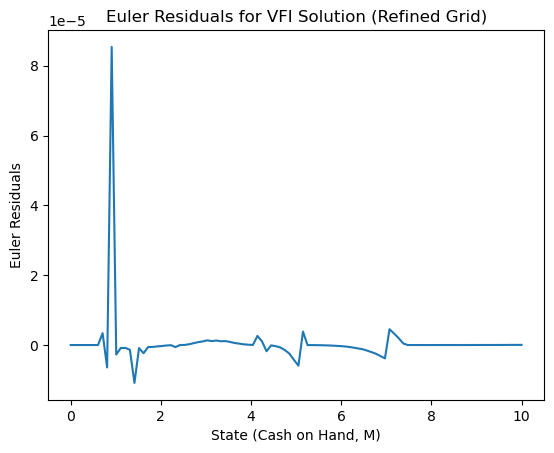

In [10]:
plot_euler_residuals(m1, c)

### Further learning resources

- Derivation of Euler equation in cake eating model [https://python.quantecon.org/cake_eating_problem.html](https://python.quantecon.org/cake_eating_problem.html)  
- Time iterations on QuantEcon [https://python.quantecon.org/coleman_policy_iter.html](https://python.quantecon.org/coleman_policy_iter.html)  

# Endogenous gridpoint method (EGM)

### **Endogenous Gridpoint Method (EGM)**  

- **Fastest and most accurate** method for **specific** continuous choice problems.  
- Works for **finite and infinite horizon** models in discrete time.  
- **Most efficient approach** for solving stochastic **consumption-savings problems**.  
- **Applicability** to other dynamic models.  
- **Several extensions** make it useful for a wider range of problems.  

### **EGM is Like Magic**  

What is the most accurate solution method for the **consumption-savings problem** so far?  

- **VFI with continuous choices**: Requires solving an **optimization problem** at **every state point**.  
- **Time Iterations**: Solves the **FOC** at **every state point**.  
- **EGM**: **No root-finding operations!**  

**Key insights:**  
- EGM is **much faster** but **only applies to a specific class of problems**.  
- Best understood **through examples** rather than abstract theory.  

### **Consumption-Savings Problem (Deatons Model)**  

$$
V(M) = \max_{0 \le c \le M} \Big\{ u(c) + \beta \mathbb{E}_{y} V\big(\underset{=M'}{\underbrace{R(M-c) + \tilde{y}}}\big) \Big\}
$$

**Model Setup:**  
- **Infinite horizon** dynamic optimization.  
- **One continuous choice**: consumption $ 0 \leq c \leq M $.  
- **State space**: beginning-of-period **cash on hand** $ M $ (discretized).  
- **Income** $ \tilde{y} $: log-normal with mean $ \mu = 0 $ and variance $ \sigma^2 $.  

### **Euler Equation for Deaton Model**  

**First-order condition (FOC):**  
$$
u'(c^\star) - \beta R \mathbb{E}_{y} V'\big(R(M-c^\star) + \tilde{y}\big) = 0
$$  

**Envelope theorem:**  
$$
V'(M) = \beta R \mathbb{E}_{y} V'\big(R(M-c^\star) + \tilde{y}\big)
$$  

**Euler equation:**  
$$
u'\big(c^\star(M)\big) = \beta R \mathbb{E}_{y} u'\big(c^\star\big(\underset{=M'}{\underbrace{R[M-c^\star(M)] + \tilde{y}}}\big)\big)
$$  
**Optimal consumption**: <br>
Equating current marginal utility to the expected discounted marginal utility of future consumption.

### **New Variable Needed for EGM: Post-Decision State $ A $**  

Define **end-of-period wealth** (savings) as:  
$$
A = M - c(M)
$$  

**Timing of the model:**  
$$
M \rightarrow c(M) \rightarrow A = M-c(M) \rightarrow M' = R(M-c(M)) + \tilde{y} = R A + \tilde{y}
$$  

Since consumption is bounded:  
$$
0 \leq c \leq M \quad \Rightarrow \quad 0 \leq A = M - c \leq M
$$  

### **Why introduce $ A $?**  
- $ A $ summarizes all relevant state and choice information needed for computing pext period state.  
- $ A $ is often called the **post-decision state**
-  **$ A $ is sufficent for $M'$** $\rightarrow$ the structure of the problem is simplified $\rightarrow$ enables the **Endogenous Grid Method (EGM)**.

### **Euler Equation with Post-Decision State**

$$
u'\big(c(M)\big) = \beta R \mathbb{E}_{y} u'\big(c(RA+\tilde{y})\big)
$$

- If the policy function $ c(M) $ is optimal, it satisfies this equation with **post-decision state**:  
  $$ A = M - c(M) $$.  
- Given any policy function $ c(M) $, an updated policy function $ c'(M') $ is defined as:

$$
\begin{cases}
c' = (u')^{-1} \Big( \beta R \mathbb{E}_{y} u'(c\big(RA+\tilde{y})\big) \Big) \\
M' = A + c'
\end{cases}
$$

- The **parameter** $ A $ spans the interval $ (0, M) $.

### **Coleman-Reffett Operator**

The *Coleman-Reffett operator* $ K(c)(M) : \mathcal{P} \rightarrow \mathcal{P} $:

- **Input:** A policy function $ c(M) \in \mathcal{P} $.  
- **Output:** An updated policy function $ c'(M) \in \mathcal{P} $ that satisfies:  

$$
u'\big(c'(M)\big) = \beta R \mathbb{E}_{y} u'\big(c[R(M-c'(M))+\tilde{y}]\big)
$$

### **Standard Implementation Steps:**
1. Fix a **grid over $ M $**.  
2. Solve for **$ c $ in each point $ M $** using the Euler equation and update the policy function.  

### **EGM Implementation of Coleman-Reffett Operator**

1. **Fix grid over $ A $** (post-decision state).  
2. **Given $ c(M) $ for each $ A $ on the grid, compute:**  

   $$
   \begin{cases}
   c' = (u')^{-1} \Big( \beta R \mathbb{E}_{y} u'(c\big(RA+\tilde{y})\big) \Big) \\
   M' = A + c'
   \end{cases}
   $$

3. **Interpolate** to construct the updated policy function $ c'(M) $ from the computed pairs $ (M',c') $.  

*EGM is time iterations solver with a much more efficient implementation of Coleman-Reffett operator*

#### EGM algorithm

1. Set a grid on (discretize) post-decision state $ A $ instead of state $ M $  
1. Set the initial policy $ c_0(M) = M $ defined over two points $ M \in \{0,\bar{M}\} $  
1. Increment iteration counter $ i $ (initialized to 0)  
1. For each point $ A_j $ on the grid over $ A $ perform the **EGM step** and return the corresponding value of
  consumption $ c_j $ and the endogenous point of wealth $ M_j = A_j+c_j $  
1. Combine all computed endogenous points in the state space $ M_j $, and their corresponding consumption levels $ c_j $ to build the
  updated policy function $ c_i(M) $  
1. Return to step 3, unless convergence achieved (policy functions $ c_i(M) $ and $ c_{i-1}(M) $ are within given tolerance)  

### **EGM Algorithm**

1. **Discretize post-decision state** $ A $ (*instead of state $ M $*).  
2. **Initialize policy function**: $ c_0(M) = M $, defined over two points $ M \in \{0, \bar{M}\} $.  
3. **Iterate**: Increment counter $ i $ (starting at 0).  
4. **For each $ A_j $ on the grid, perform the EGM step**:
   - Compute **consumption** $ c_j $ by *analytically inverting Euler Equation* 
   - Compute **endogenous wealth** $ M_j = A_j + c_j $.
   - More details -> next slide
5. **Construct updated policy function** $ c_i(M) $ by interpolating the computed points $ (M_j, c_j) $.  
6. **Check for convergence**:  
   - If $ c_i(M) $ and $ c_{i-1}(M) $ are within tolerance, return $ c_i(M) $.  
   - Otherwise, repeat from step 3.  

### **EGM Algorithm: EGM Step**

For a given grid point $ A_j $:
1. **Compute next-period wealth**:  $$ M'_j = R A_j + \tilde{y} $$ 
       - replace $ \tilde{y} $ with quadrature points.  
2. **Evaluate next-period consumption**:  
       - Use the previous iteration policy function $ c_{i-1}(\cdot) $ at each quadrature point.  
3. **Compute marginal utility**:  
       - Calculate $ u'(c_{i-1}(M'_j)) $ and complete expectation in Euler equation RHS.  
4. **Compute current-period consumption**:  
       - Use the inverse marginal utility function to obtain $ c_j $.  
5. **Compute endogenous wealth**:  
   $$ M_j = A_j + c_j $$ This completes the EGM step.  

### **Properties of EGM Algorithm**

- **Successive approximations** in *policy function space*.  
- **Same structure as time iterations**, but with a *more efficient implementation of the Coleman-Reffett operator*.  
- **Policy function updates via the EGM step** instead of direct optimization.  
- **No root-finding operations** → direct computation → **fast**.  
- **Euler equation holds at endogenous state points** → **accurate**.  

### **EGM Principle**

- Instead of solving for the optimal decision at each fixed grid point in the state space...  
- Find the *endgenous* state point where a *guessed* decision would be optimal.  

### **Example: Deterministic Consumption-Savings Model**

The value function maximization problem:

$$
V(M) = \max_{0 \leq c \leq M} \big\{ \log(c) + \beta V\big(R(M - c) + y\big) \big\}
$$

First-order condition (Euler equation):

$$
u'\big(c^\star(M)\big) = \beta R u'\big(c^\star\big(R[M - c^\star(M)] + y\big)\big)
$$

Using the **EGM step**, we express consumption and wealth as:

$$
\begin{cases}
c' = (u')^{-1} \Big( \beta R u'(c\big(RA + y)\big) \Big) \\
M' = A + c
\end{cases}
$$

This reformulation enables **efficient computation** of the policy function using endogenous gridpoints.

###  Clear notebook memory and import

In [11]:
%clear  # clear notebook memory
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline


### Set up plotting tool

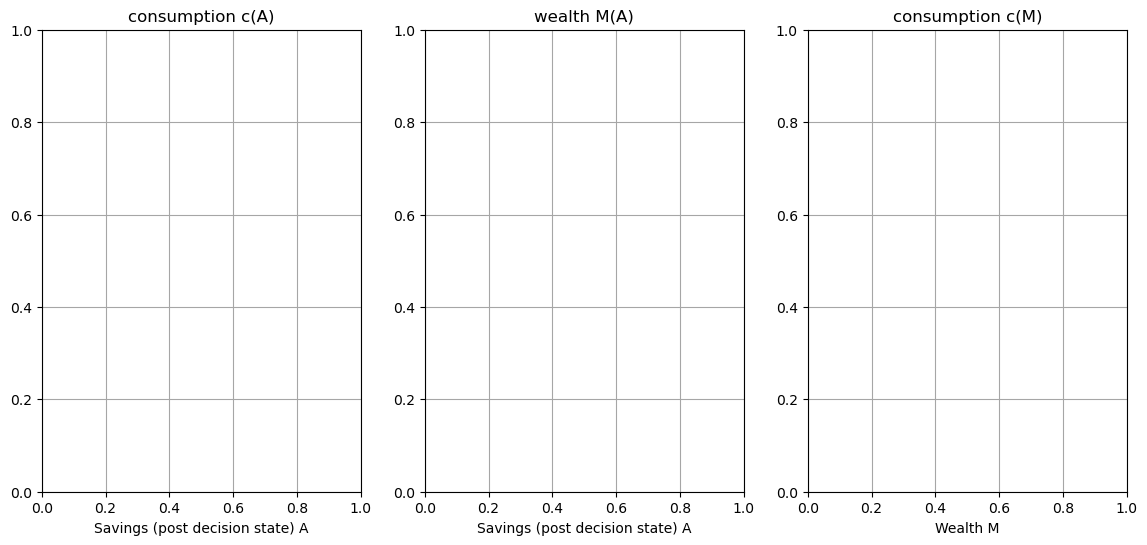

In [12]:
# set up plotting
fig, ax = plt.subplots(1,3,figsize=(14,6))
for axi in ax:
    axi.grid(which='both', color='0.65', linestyle='-')
ax[0].set_title('consumption c(A)')
ax[1].set_title('wealth M(A)')
ax[2].set_title('consumption c(M)')
ax[0].set_xlabel('Savings (post decision state) A')
ax[1].set_xlabel('Savings (post decision state) A')
ax[2].set_xlabel('Wealth M')
# make colors generator
# https://stackoverflow.com/questions/37890412/increment-matplotlib-color-cycle
from itertools import cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])
def plot_iter(a,m,c):
    color = next(colors)
    ax[0].plot(a,c,linewidth=0.5,c=color)
    ax[1].plot(a,m,linewidth=0.5,c=color)
    ax[2].plot(m,c,linewidth=0.5,c=color)
    ax[0].scatter(a,c,s=11,c=color)
    ax[1].scatter(a,m,s=11,c=color)
    ax[2].scatter(m,c,s=11,c=color)
    return fig

### Set up grids and parameters and plot

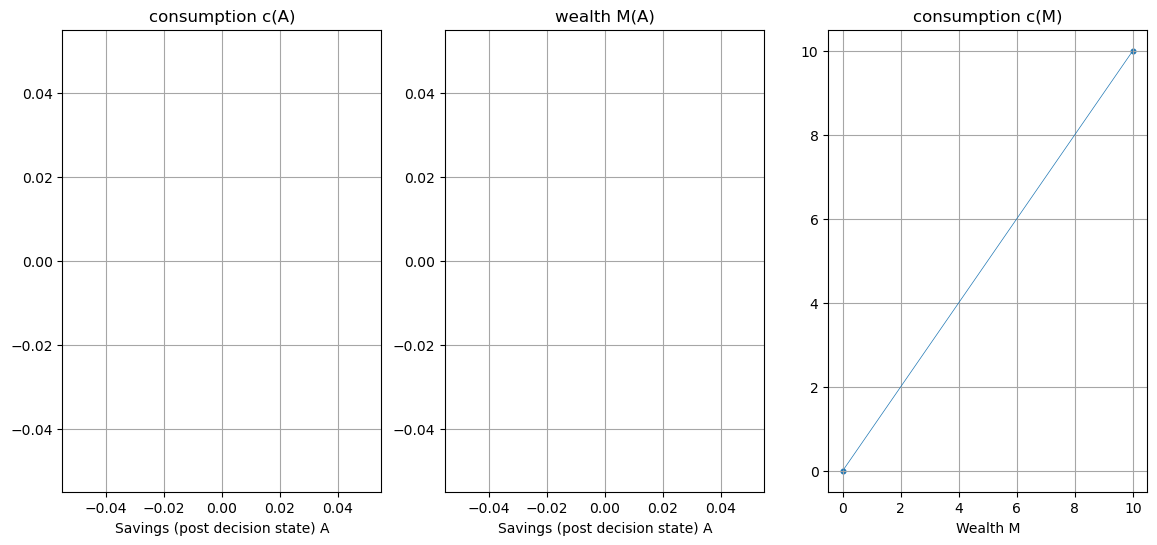

In [13]:
beta,R,y = 0.95,1.,0.    # fundamentals (cake eating)
Mbar,ngrid = 10,5       ### Set up plotting tool # technical parameters
u = lambda c: np.log(c)  # utility function
mu = lambda c: 1/c       # marginal utility function
imu = lambda u: 1/u      # inverse marginal utility function

A = np.linspace(0,Mbar,ngrid)  # What are the bounds of A?
c0 = np.array([0,Mbar])
M0 = np.array([0,Mbar])

# Iteration 0
plot_iter(np.full(2,np.nan),M0,c0)

### Do iteation iteration 1

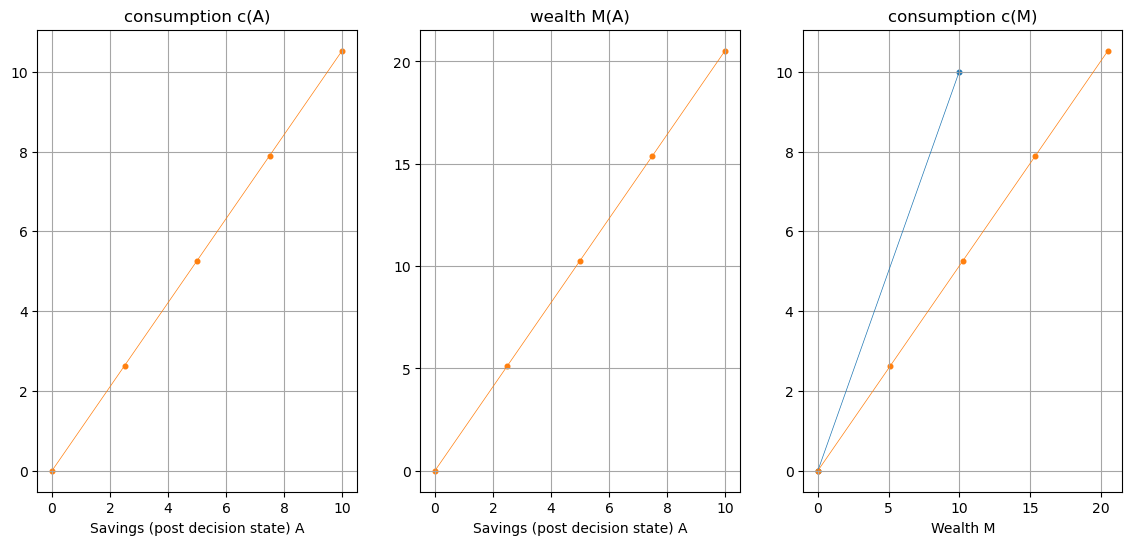

In [14]:
# Iteration 1
policy = interpolate.interp1d(M0,c0,kind='slinear',fill_value="extrapolate")  # interpolation function for policy
M1 = np.full(ngrid,np.nan)
c1 = np.full(ngrid,np.nan)
for j,aj in enumerate(A):
    Mpr = max(R*aj+y,1e-10)        # next period wealth
    cpr = policy(Mpr)              # next period consumption
    c1[j] = imu( beta*R*mu(cpr) )  # inverse Euler
    M1[j] = aj + c1[j]             # endogenous wealth
plot_iter(A,M1,c1)             # returns fig object, plotted automatically

### Do iteation iteration 2

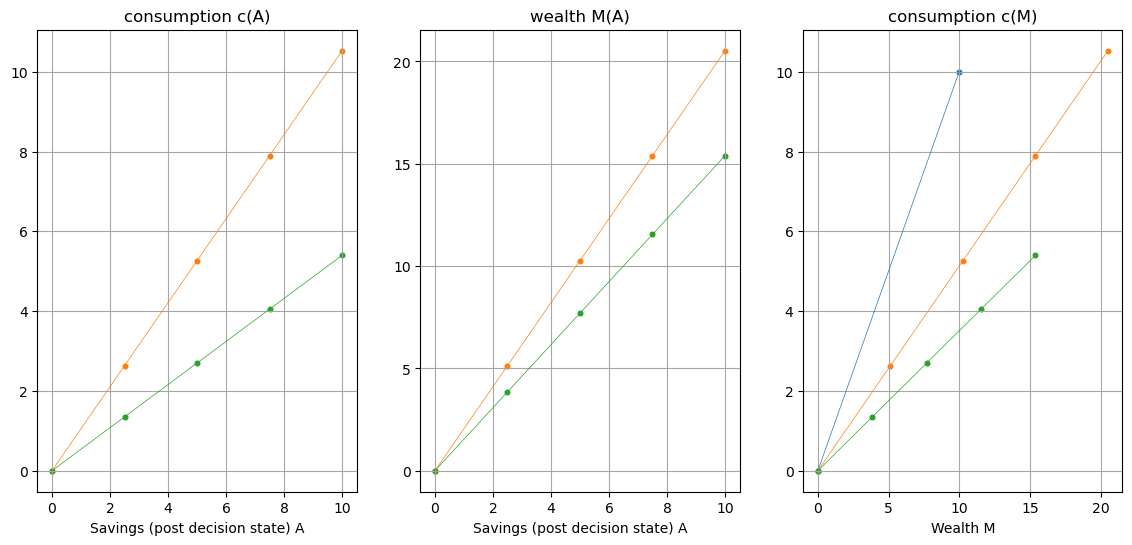

In [15]:
# Iteration 2
policy = interpolate.interp1d(M1,c1,kind='slinear',fill_value="extrapolate")  # interpolation function for policy
M2 = np.full(ngrid,np.nan)
c2 = np.full(ngrid,np.nan)
for j,aj in enumerate(A):
    Mpr = max(R*aj+y,1e-10)        # next period wealth
    cpr = policy(Mpr)              # next period consumption
    c2[j] = imu( beta*R*mu(cpr) )  # inverse Euler
    M2[j] = aj + c2[j]             # endogenous wealth
plot_iter(A,M2,c2)             # returns fig object, plotted automatically

### Corner solutions in EGM

- So far only covered the interior solutions where the Euler equation holds  
- What about the restriction $ 0 \le c \le M $ which is equivalent to $ 0 \le A \le M $?  


1. By choosing the grid on $ A $ to respect the constraint $ 0 \le A \le M $ EGM only implements interior solutions  
1. Corner solutions must be added with an additional provisions in the code  

#### Lower bound on consumption

- $ c \ge 0 $ is never binding if utility function satisfies  


$$
\lim_{c \rightarrow 0} u(c) = -\infty
$$

- all our usual utility functions like $ \log(c) $ or CRRA utility $ \frac{c^\lambda - 1}{\lambda} $ satisfy this condition  

#### Upper bound on consumption

- If $ c \le M $ is binding, then $ A=0 $, can be computed directly  


**Proposition** If utility function $ u(c) $ in the consumption-savings model is monotone and concave, then end-of-period wealth $ A=M-c $ is non-decreasing in M.

- Let $ M_0 = (u')^{-1} \Big( \beta R \mathbb{E}_{y} u'(c(\tilde{y})\big) \Big) $ denote the point that corresponds to $ A=0 $  
- Due to the proposition, for all $ M<M_0 $ the end of period wealth must be zero, and thus optimal consumption $ c=M $ is the corner solution  
- To implement this in the code, we just need to add a 45 degrees segment to the consumption function below $ M_0 $  

### Clear memory and set up plotting tool again

In [16]:
%clear  # clear notebook memory
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

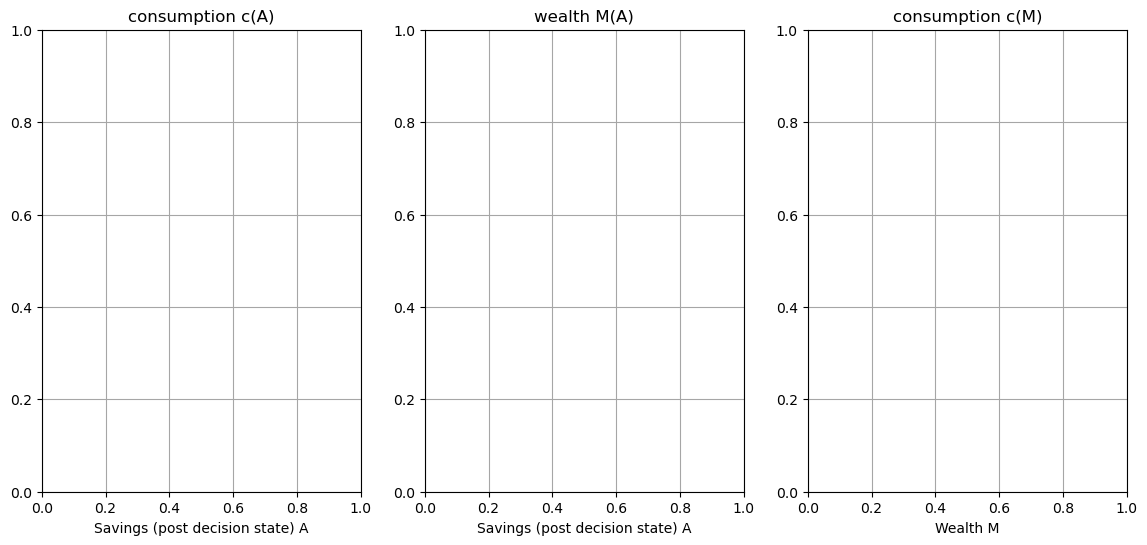

In [17]:
# set up plotting
fig, ax = plt.subplots(1,3,figsize=(14,6))
for axi in ax:
    axi.grid(which='both', color='0.65', linestyle='-')
ax[0].set_title('consumption c(A)')
ax[1].set_title('wealth M(A)')
ax[2].set_title('consumption c(M)')
ax[0].set_xlabel('Savings (post decision state) A')
ax[1].set_xlabel('Savings (post decision state) A')
ax[2].set_xlabel('Wealth M')
# make colors generator
# https://stackoverflow.com/questions/37890412/increment-matplotlib-color-cycle
from itertools import cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])
def plot_iter(a,m,c):
    color = next(colors)
    ax[0].plot(a,c,linewidth=0.5,c=color)
    ax[1].plot(a,m,linewidth=0.5,c=color)
    ax[2].plot(m,c,linewidth=0.5,c=color)
    ax[0].scatter(a,c,s=11,c=color)
    ax[1].scatter(a,m,s=11,c=color)
    ax[2].scatter(m,c,s=11,c=color)
    return fig

### Set up grids and parameters and plot

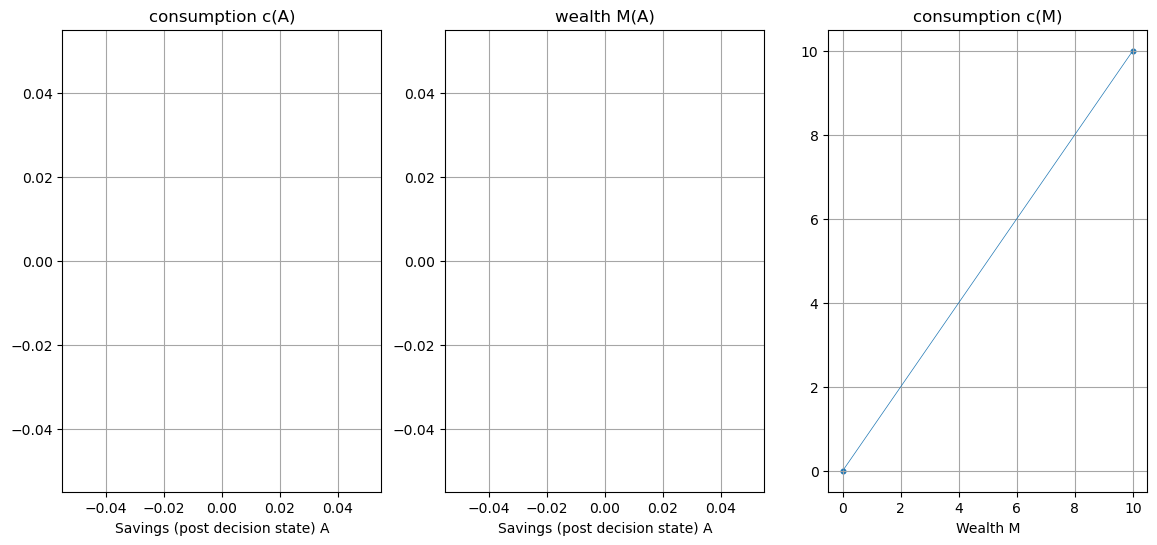

In [18]:
beta,R,y = 0.95,1.05,1   # fundamentals
Mbar,ngrid = 10,5        # technical parameters
u = lambda c: np.log(c)  # utility function
mu = lambda c: 1/c       # marginal utility function
imu = lambda u: 1/u      # inverse marginal utility function

A = np.linspace(0,Mbar,ngrid)  # What are the bounds of A?
c0 = np.array([0,Mbar])
M0 = np.array([0,Mbar])

# Iteration 0
plot_iter(np.full(2,np.nan),M0,c0)


### Set up iterartion function - where we add one point at the origin

In [19]:
# Iteration function
Aex = np.full(ngrid+1,np.nan)
Aex[1:] = A
def iter(M0,c0):
    policy = interpolate.interp1d(M0,c0,kind='slinear',fill_value="extrapolate")  # interpolation function for policy
    M1 = np.full(ngrid+1,np.nan)
    c1 = np.full(ngrid+1,np.nan)
    M1[0] = c1[0] = 0              # REMARK: add one point at the origin!!!
    for j,aj in enumerate(A):
        Mpr = max(R*aj+y,1e-10)    # next period wealth
        cpr = policy(Mpr)          # next period consumption
        c = imu( beta*R*mu(cpr) )  # inverse Euler
        M = aj + c                 # endogenous wealth
        M1[j+1] = M                # save to array
        c1[j+1] = c
    pt = plot_iter(Aex,M1,c1)        # returns fig object, plotted automatically
    return M1,c1,pt

### Do an iteration

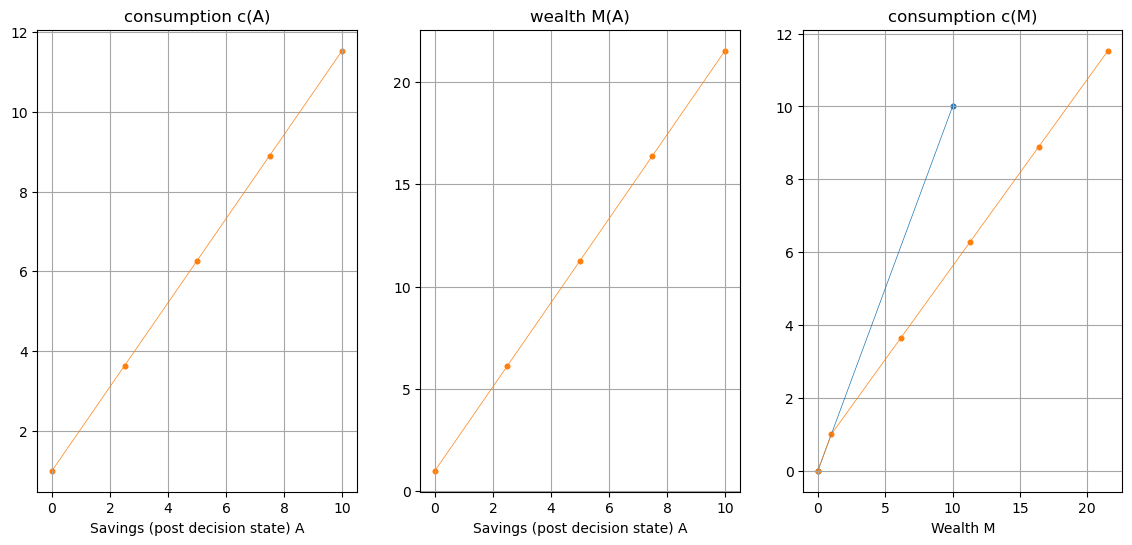

In [20]:
M1,c1,pt = iter(M0,c0)
pt

### Do another iteration

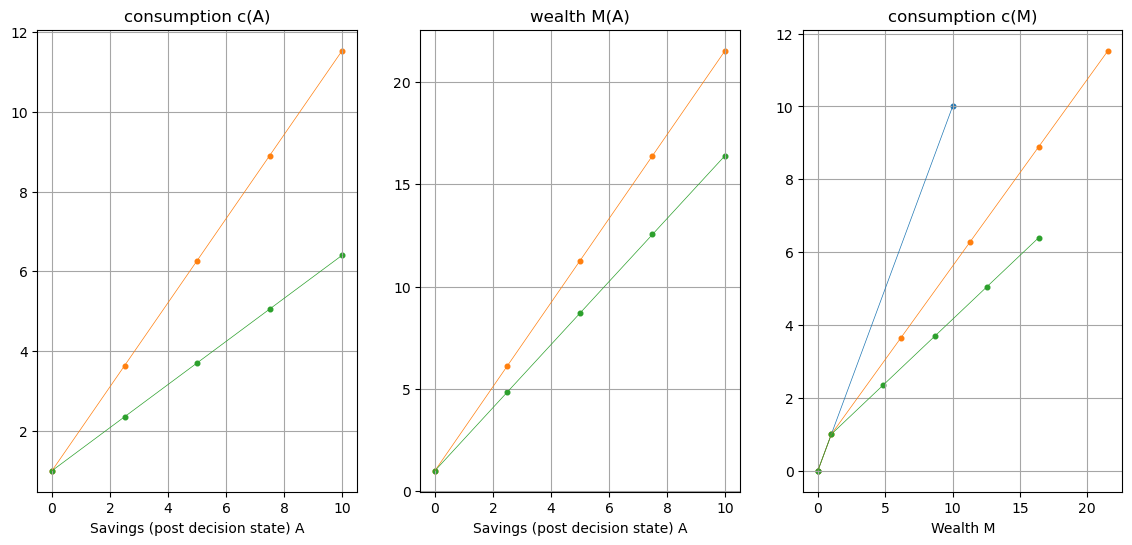

In [21]:
M,c,pt = iter(M1,c1)
pt

### Do more iterations 

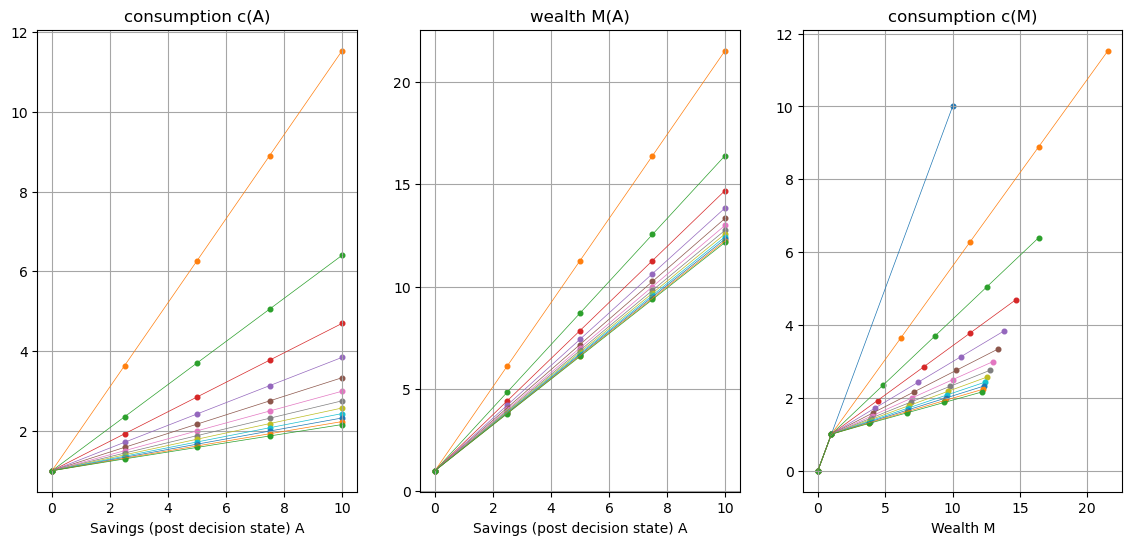

In [22]:
for i in range(10):
    M,c,pt = iter(M,c)
pt

### Prepare for DEATON: Clear memory and set up plotting tool again

In [23]:
%clear  # clear notebook memory
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

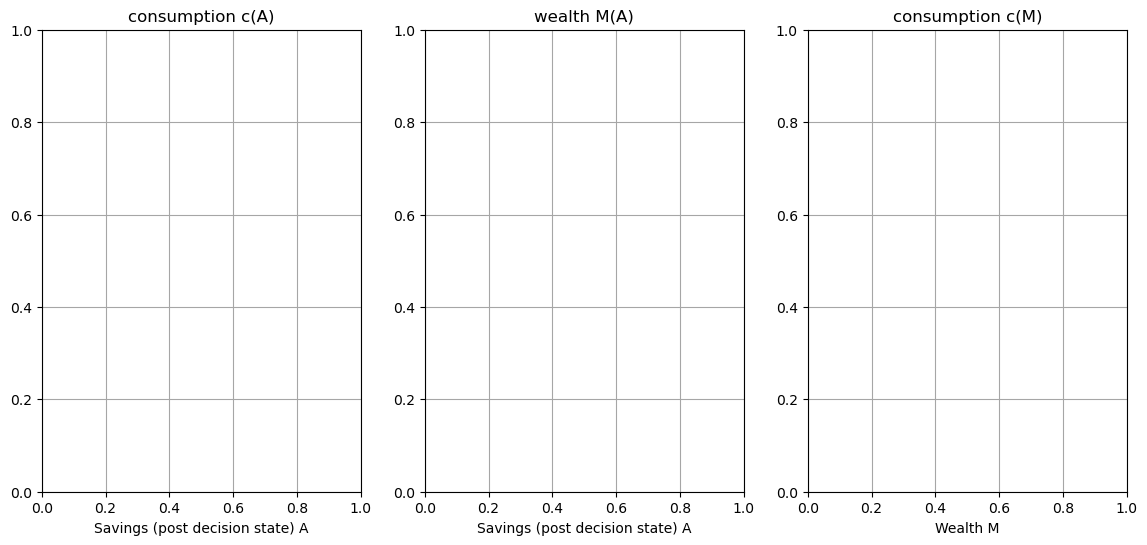

In [24]:
# set up plotting
fig, ax = plt.subplots(1,3,figsize=(14,6))
for axi in ax:
    axi.grid(which='both', color='0.65', linestyle='-')
ax[0].set_title('consumption c(A)')
ax[1].set_title('wealth M(A)')
ax[2].set_title('consumption c(M)')
ax[0].set_xlabel('Savings (post decision state) A')
ax[1].set_xlabel('Savings (post decision state) A')
ax[2].set_xlabel('Wealth M')
# make colors generator
# https://stackoverflow.com/questions/37890412/increment-matplotlib-color-cycle
from itertools import cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])
def plot_iter(a,m,c):
    color = next(colors)
    ax[0].plot(a,c,linewidth=0.5,c=color)
    ax[1].plot(a,m,linewidth=0.5,c=color)
    ax[2].plot(m,c,linewidth=0.5,c=color)
    ax[0].scatter(a,c,s=11,c=color)
    ax[1].scatter(a,m,s=11,c=color)
    ax[2].scatter(m,c,s=11,c=color)
    return fig

### Set up Deaton 

In [25]:
# model parameters
beta =  0.95 # discount factor
R =1.05 # Returns on savins
μ=1 # mean of ln(y)
σ=1 # std dev of ln(y)  
η = 1 # CRRA parameter

# technical parameters
Mbar = 10  # max value of Cash on hand
ngrid = 5  # number of grid points        
n_y=10;    # number of quad points    

def util(c): # utility function
    '''CRRA utility function'''
    if η==1:
        return np.log(c)
    elif η>=0:
        return (c**(1-η) -1)/(1-η)
    
mutil = lambda c: c**(-η)       # marginal utility function
imutil = lambda mu: mu**(-1/η)   # inverse marginal utility function
    
# grids for Assets and allocation of space for c and M
A = np.linspace(0,Mbar,ngrid)  
c0 = np.array([0,Mbar])
M0 = np.array([0,Mbar])

# quadrture grids for y (adjusted weights and nodes)
q, w = np.polynomial.legendre.leggauss(n_y) # legendre quadrture nodes and weights on [-1,1]
Ginv = lambda z:  np.exp(scipy.stats.norm.ppf(z, loc=μ, scale =σ))  # inverse cdf of log-normal
weights=w/2; # change of varibale to adjust to [0,1] interval
y = Ginv((q+1)/2) # use change of variable to adjust nodes to [0,1] interval and use Ginv to obntain y

### EGM iteration for Deatons model

In [26]:
Aex = np.full(ngrid+1,np.nan)
Aex[1:] = A
def deaton_egm_iter(M0,c0): # EGM iteration function for Deatons Model
    policy = interpolate.interp1d(M0,c0,kind='slinear',fill_value="extrapolate")  # interpolation function for policy
    M1 = np.full(ngrid+1,np.nan)
    c1 = np.full(ngrid+1,np.nan)

    M1[0] = c1[0] = 0              # REMARK: add one point at the origin!!!

    for j,aj in enumerate(A):
        Mpr = np.maximum(R*aj+y,1e-10)    # next period wealth
        cnext = policy(Mpr)          # next period consumption
        Emu1 = beta*R*np.sum(weights*mu(cnext)) # expected marginal utility next period consumption
        c = imutil(Emu1)  # inverse Euler
        M = aj + c                 # endogenous wealth
        M1[j+1] = M                # save to array
        c1[j+1] = c
    pt = plot_iter(Aex,M1,c1)      # returns fig object, plotted automatically
    return M1,c1,pt

### Let's solve Deatons model using EGM

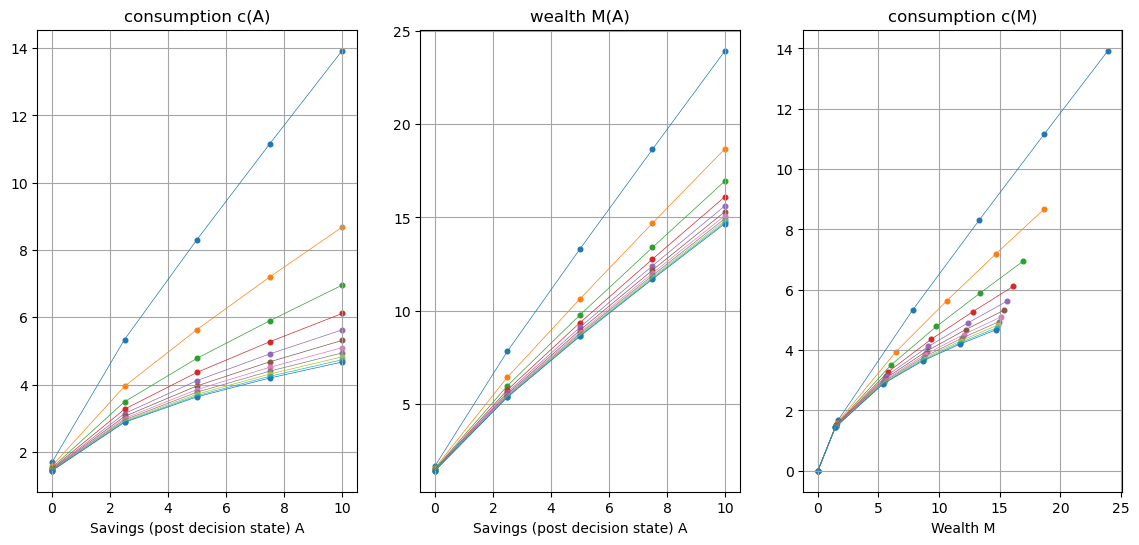

In [27]:
M,c,pt = deaton_egm_iter(M0,c0)
for i in range(10):
    M,c,pt = deaton_egm_iter(M,c)
pt

### Class of models solvable by EGM

- finite and infinite horizon dynamic models with continuous choice  
- strictly concave monotone and differentiable utility function (with analytic inverse marginal)  
- one continuous state variable (wealth) and one continuous choice variable (consumption)  
- particular structure of the law of motion for state variables (intertemporal budget constraint)  
- occasionally binding borrowing constraints  
- can also easily allow additional quasi-exogenous state variables (with motion rules dependent on $ A $ and not $ M $ or $ c $)  


Rather small class, although many important models in micro and macro economics are included

### Generalizations of EGM

Multiple dimensions: hard because irregular grids in multiple dimensions

- 📖 Barillas & Fernandez-Villaverde, JEDC 2007 “A Generalization of the Endogenous Grid Method”  
- 📖 Ludwig & Schön, Computational Economics, 2018 “Endogenous Grids in Higher Dimensions: Delaunay Interpolation and Hybrid Methods”  
- 📖 Matthew White, JEDC 2015 “The Method of Endogenous Gridpoints in Theory and Practice”  
- 📖 Iskhakov, Econ Letters 2015 “Multidimensional endogenous gridpoint method: solving triangular dynamic stochastic optimization problems without root-finding operations” + Corrigendum  

### Generalizations of EGM

Non-convex problems: hard because Euler equation is not a sufficient condition any longer

- 📖 Giulio Fella, RED 2014 “A Generalized Endogenous Grid Method for Non-Smooth and Non-Concave Problems”  
- 📖 Iskhakov, Jørgensen, Rust, Schjerning, QE 2017 “The Endogenous Grid Method for Discrete-Continuous Dynamic Choice Models with (or without) Taste Shocks”  
- 📖 Jeppe Druedahl, Thomas Jørgensen, JEDC 2017 “A General Endogenous Grid Method for Multi-Dimensional Models with Non-Convexities and Constraints”  
- 📖 Jeppe Druedahl, Computational Economics, 2021, "A guide on solving non-convex consumption-saving models." 

### Further learning resources

- 📖 Chris Carroll (2006) Original article on EGM
  [http://pages.stern.nyu.edu/~dbackus/Computation/Carroll%20endog%20grid%20EL%2006.pdf](http://pages.stern.nyu.edu/~dbackus/Computation/Carroll%20endog%20grid%20EL%2006.pdf)  
- Literature cited above  
- 📖 >700 citations of Carroll’s paper
  [https://scholar.google.com/scholar?cites=20745560105937946&as_sdt=2005&sciodt=0,5&hl=en](https://scholar.google.com/scholar?cites=20745560105937946&as_sdt=2005&sciodt=0,5&hl=en)  